In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel="ibm_quantum",
    token="0a2449f2c0070d110881d23f1901b55b4fa28bb4979ef64088d971415bc21f09623ab31a26458d0d53d2e563bb5d74af854c90ead93b2bda8f70f81cc0066ee8",
)
backend = service.least_busy(operational=True, simulator=False)
backend.name

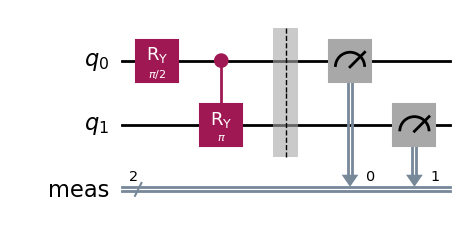

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.compiler import transpile
import numpy as np
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

circuit = QuantumCircuit(2)

# phi = Parameter("phi")
circuit.ry(np.pi / 2, 0)
# circuit.ry(phi, 0)
circuit.cry(np.pi, 0, 1)
# circuit.cry(phi, 0, 1)
# bc = circuit.assign_parameters({phi: np.pi / 2})
# bc = circuit.assign_parameters({phi: np.pi})

circuit.measure_all()
# bc.measure_all()

circuit.draw(output="mpl", idle_wires=False)
# bc.draw(output="mpl", idle_wires=False)

# Step 2: Optimize problem for quantum execution.
# isa_circuit = transpile(circuit, backend=simulator)
# isa_circuit.draw(output="mpl", idle_wires=False)

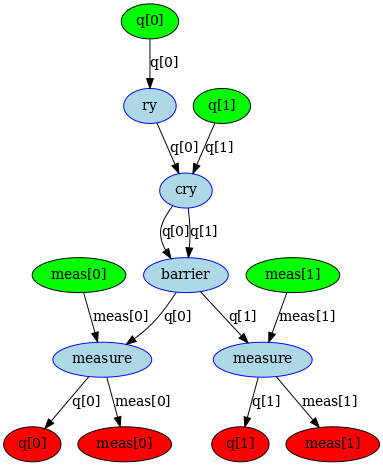

In [3]:
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

dag = circuit_to_dag(bc)
dag_drawer(dag)

In [2]:
isa_circuit.num_parameters

NameError: name 'isa_circuit' is not defined

In [ ]:
from qiskit.visualization import plot_histogram

# Step 3: Execute using Qiskit primitives.

shots = 1024

sampler = Sampler(backend)
job = sampler.run([(isa_circuit,)], shots=shots)
bits = job.result()[0].data.meas

plot_histogram(bits.get_counts())

In [ ]:
from qiskit.visualization import plot_histogram

# Step 3: Execute using Qiskit primitives.


# rng = np.random.default_rng(1234)
# parameter_values = np.array(
#     [rng.uniform(-np.pi, np.pi, size=circuit.num_parameters) for _ in range(shots)]
# )

parameter_values = np.linspace(0, np.pi, 20)

sampler = Sampler(backend)
job = sampler.run([(isa_circuit, parameter_values)])
bits = job.result()[0].data.meas
plot_histogram(bits.get_counts())

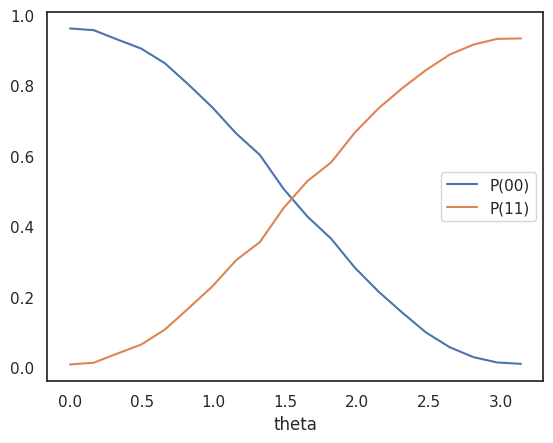

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

p0s = np.sum(bits.array == 0, axis=1) / bits.num_shots
p1s = np.sum(bits.array == 1, axis=1) / bits.num_shots
p2s = np.sum(bits.array == 2, axis=1) / bits.num_shots
p3s = np.sum(bits.array == 3, axis=1) / bits.num_shots

plt.plot(parameter_values, p0s, label="P(00)")
# plt.plot(parameter_values, p1s, label="P(01)")
# plt.plot(parameter_values, p2s, label="P(10)")
plt.plot(parameter_values, p3s, label="P(11)")

plt.xlabel("theta")
plt.legend()
plt.show()